In [9]:
from langgraph.graph import StateGraph , START ,END
from typing import TypedDict

In [13]:
class BMIState(TypedDict):
    height_m: float
    weight_kg: float
    bmi: float
    category: str

In [7]:
def calculate_bmi_function(state: BMIState) -> BMIState:

    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight / (height ** 2)

    state['bmi'] = round(bmi,2)

    return state

In [14]:
def catagorized(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        category = 'Overweight'
    else:
        category = 'Obesity'
    
    state['category'] = category
    return state

In [15]:
#define your graph
graph = StateGraph(BMIState)

#add nodes to your graph
graph.add_node('calculate_bmi',calculate_bmi_function)
graph.add_node('catagorized',catagorized)

#add edges to your graph
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','catagorized')
graph.add_edge('catagorized',END)

#compile the graph
workflow = graph.compile()


In [16]:
inital_state = {'height_m':1.75,'weight_kg':70}
#excute the graph
final_state = workflow.invoke(inital_state)

print(final_state)

{'height_m': 1.75, 'weight_kg': 70, 'bmi': 22.86, 'category': 'Normal weight'}


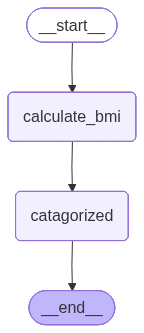

In [17]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())